# <span style='font-size: 3em;'>Star Wars</span>

### The team of <a href='http://fivethirtyeight.com/' target='_blank'>FiveThirtyEight</a> bacame interested in answering some questions about Star Wars fans. In particular, they wondered: <span style="font-size: 1.1em; font-weight: bold; color: red;">does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?</span>

<br /><br />

In [4]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Load data
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

star_wars.shape

(1187, 38)

In [6]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning data

In [7]:
# Checking columns
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [8]:
# Remove all rows with ResponseId equal NaN
star_wars = star_wars[star_wars['RespondentID'].notnull()]

star_wars.shape

(1186, 38)

In [9]:
# Convert the columns to boolean
yes_no = {'Yes': True, 'No': False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [10]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()


True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [11]:
star_wars[star_wars.columns[3:9]] = star_wars[star_wars.columns[3:9]].fillna(False)
star_wars[star_wars.columns[3:9]] = star_wars[star_wars.columns[3:9]].astype('bool')

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


In [13]:
# Rename columns

cols = {}
pos = 4
for col in star_wars.columns[3:6]:
    cols[col] = 'seen_movie_{}'.format(pos)
    pos += 1
    
pos = 1
for col in star_wars.columns[6:9]:
    cols[col] = 'seen_movie_{}'.format(pos)
    pos += 1
    
star_wars.rename(columns = cols, inplace = True)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_movie_4,seen_movie_5,seen_movie_6,seen_movie_1,seen_movie_2,seen_movie_3,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [15]:
# Convert rank columns to float data type and rename them

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

cols = {}
pos = 4
for col in star_wars.columns[9:12]:
    cols[col] = 'ranking_movie_{}'.format(pos)
    pos += 1
    
pos = 1
for col in star_wars.columns[12:15]:
    cols[col] = 'ranking_movie_{}'.format(pos)
    pos += 1
    
star_wars.rename(columns = cols, inplace = True)

star_wars.iloc[:,9:15].head()

,ranking_movie_4,ranking_movie_5,ranking_movie_6,ranking_movie_1,ranking_movie_2,ranking_movie_3
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


## <span style='color: red;'>Find the highest-ranked move</span>

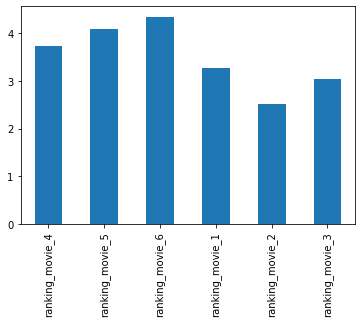

In [16]:
star_wars.iloc[:, 9:15].mean().plot.bar();

### <span style='color: blue;'>Ranking</span>

#### The three first movies are the highest-ranked. Following the order of the 2sd, 1st, and 3rd movie. Those are the original movies.

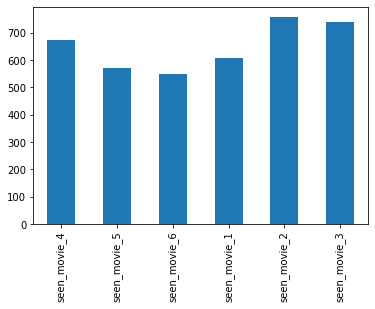

In [17]:
star_wars.iloc[: ,3:9].sum().plot.bar();

### <span style='color: blue;'>Number of views</span>

#### The first two movies of the trilogy have had more seen than the others that can relate to why they have a better ranking. At least is possible to say that the second movies were more popular.


## <span style='color: red;'>What are the number of views and the rank of different groups? Analyzing the number of views for fans vs non-fans and gender.</span>

## <span style='color: blue;'>Gender</span>

In [18]:
male = star_wars[star_wars['Gender'] == 'Male']
female = star_wars[star_wars['Gender'] == 'Female']

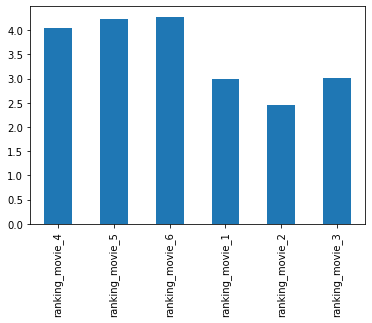

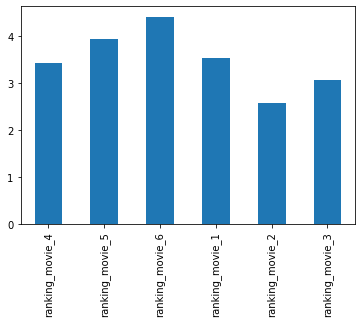

In [19]:
male.iloc[:, 9:15].mean().plot.bar()
plt.show();

female.iloc[:, 9:15].mean().plot.bar();

### <span style='color: blue;'>Ranking</span>

#### The ranking per gender follows the same as the ranking in general and the first movies still highest-ranked.

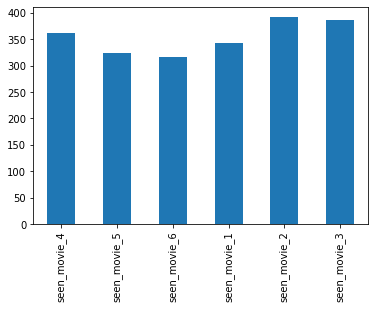

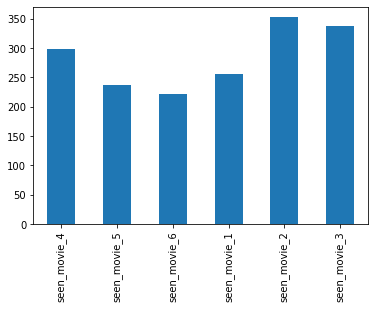

In [20]:
male.iloc[:, 3:9].sum().plot.bar()
plt.show();

female.iloc[:, 3:9].sum().plot.bar();

### <span style='color: blue;'>Number of views</span>

#### Same for the number of views. The first movies have more views but we have more males watching the trilogy than females.


## <span style='color: blue;'>Fans</span>

In [21]:
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

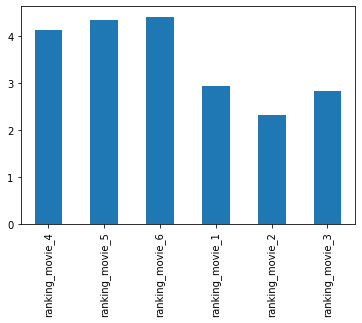

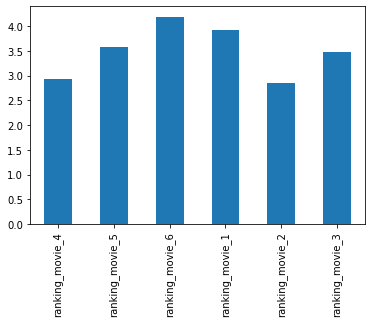

In [22]:
fans.iloc[:, 9:15].mean().plot.bar()
plt.show();

non_fans.iloc[:, 9:15].mean().plot.bar();

### <span style='color: blue;'>Ranking</span>

#### The fans have a big preference for the first three movies while the non-fans ranked them at the same level. Even to non-fans, the 4th move is the second highest-ranked.

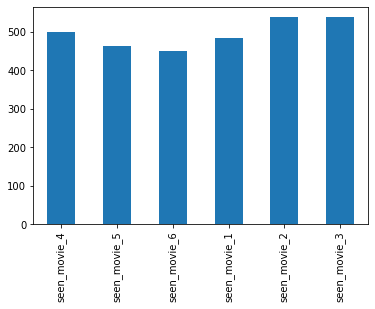

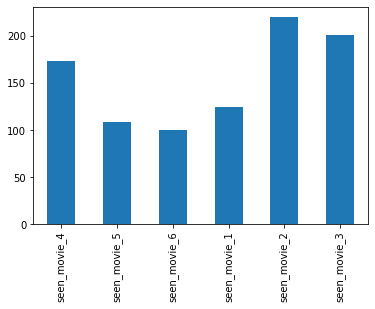

In [23]:
fans.iloc[:, 3:9].sum().plot.bar()
plt.show();

non_fans.iloc[:, 3:9].sum().plot.bar();

### <span style='color: blue;'>Number of views</span>

#### The fans have almost a stable number of views to all movies while the non-fans dropped the views violently after the fourth movie and the first was not popular too. <br />The difference in the number of views between fans and non-fans is almost double for the fans.

<br /><br />
## <span style='color: red;'>Are the household income and education level correlated with be a fan or not and the ranking of the movies?</span>



## <span style='color: blue;'>Household income</span>

In [37]:
income = star_wars.groupby('Household Income').agg(np.mean)

income.iloc[:, 9:15].round(2)

,ranking_movie_5,ranking_movie_6,ranking_movie_1,ranking_movie_2,ranking_movie_3
Household Income,,,,,
"$0 - $24,999",3.96,4.10,3.17,2.74,3.20
"$100,000 - $149,999",4.17,4.40,3.40,2.40,2.85
"$150,000+",4.38,4.57,2.96,2.32,3.03
"$25,000 - $49,999",3.87,4.25,3.65,2.48,3.28
"$50,000 - $99,999",4.18,4.34,3.09,2.45,3.11


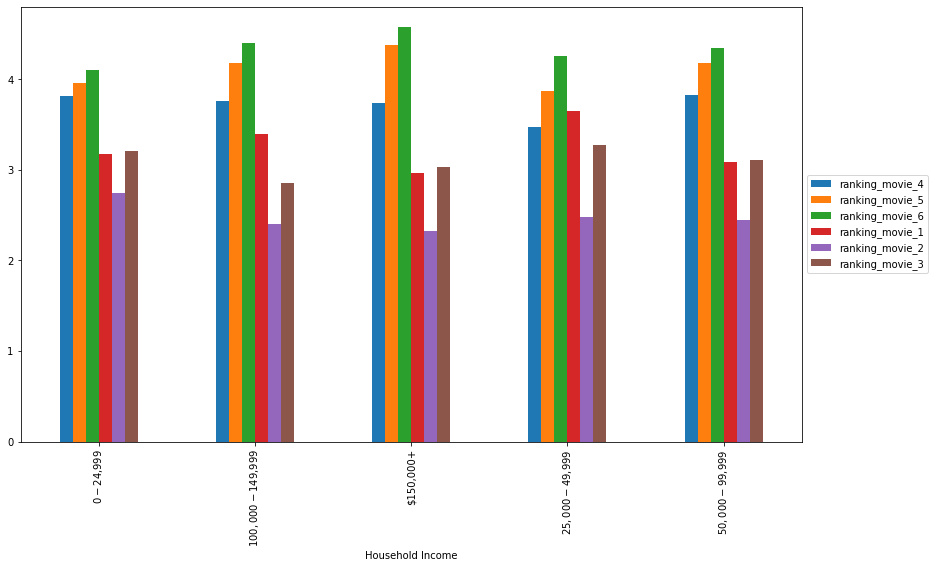

In [61]:
income.reset_index(inplace = True)

income.plot(x = 'Household Income', y = income.columns[11:17], kind='bar', figsize = (14,8));
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

### <span style='color: blue;'>Ranking</span>

#### For all household income, the second movie is the highest-ranked and the sixth is the least-ranked.

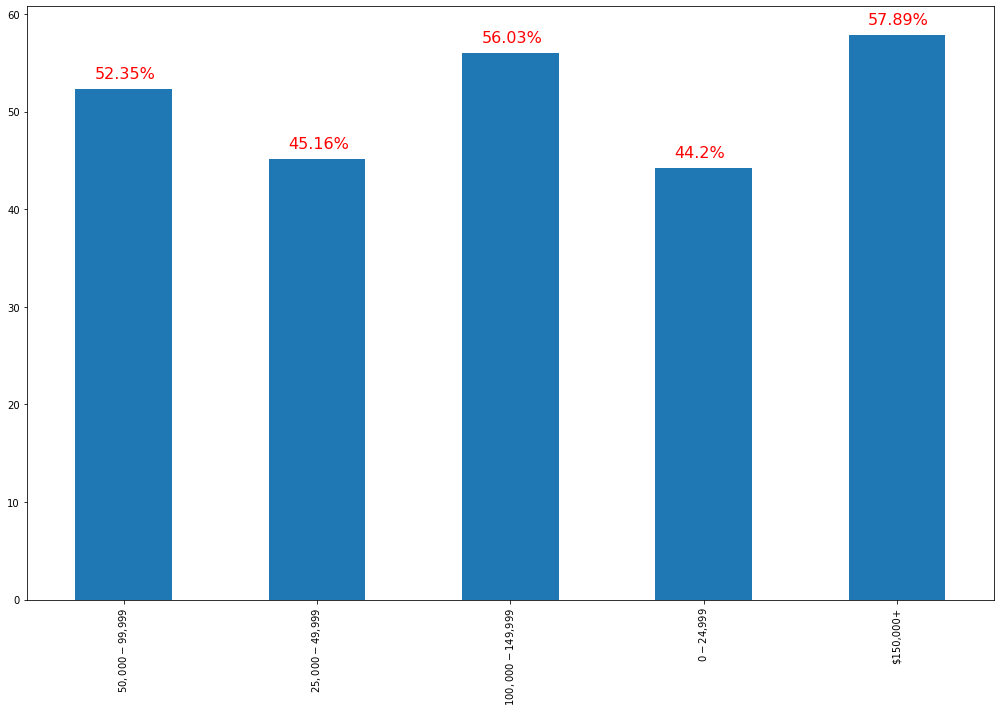

In [122]:
# Porcentage of fans per household income

ax = (
        (fans['Household Income'].value_counts() / star_wars['Household Income'].value_counts() * 100)
        .plot.bar(figsize = (14,10))
)

for p in ax.patches:
    ax.annotate('{}%'.format(round(p.get_height(), 2)), (p.get_x() + 0.1, p.get_height() + 1.1), fontsize = 16, color = 'red')
    ax.text

plt.tight_layout()
plt.show()

### <span style='color: blue;'>Fans per household income</span>

#### The percentage of fans per household income is bigger for the highest income.



## <span style='color: blue;'>Education</span>

In [129]:
education = star_wars.groupby('Education').agg(np.mean)

education.iloc[:, 9:15].round(2)

,ranking_movie_5,ranking_movie_6,ranking_movie_1,ranking_movie_2,ranking_movie_3
Education,,,,,
Bachelor degree,4.29,4.52,3.11,2.31,2.93
Graduate degree,4.23,4.50,3.20,2.32,2.92
High school degree,3.75,4.13,3.21,2.87,3.24
Less than high school degree,5.33,3.67,2.67,1.00,3.33
Some college or Associate degree,3.89,4.10,3.50,2.78,3.17


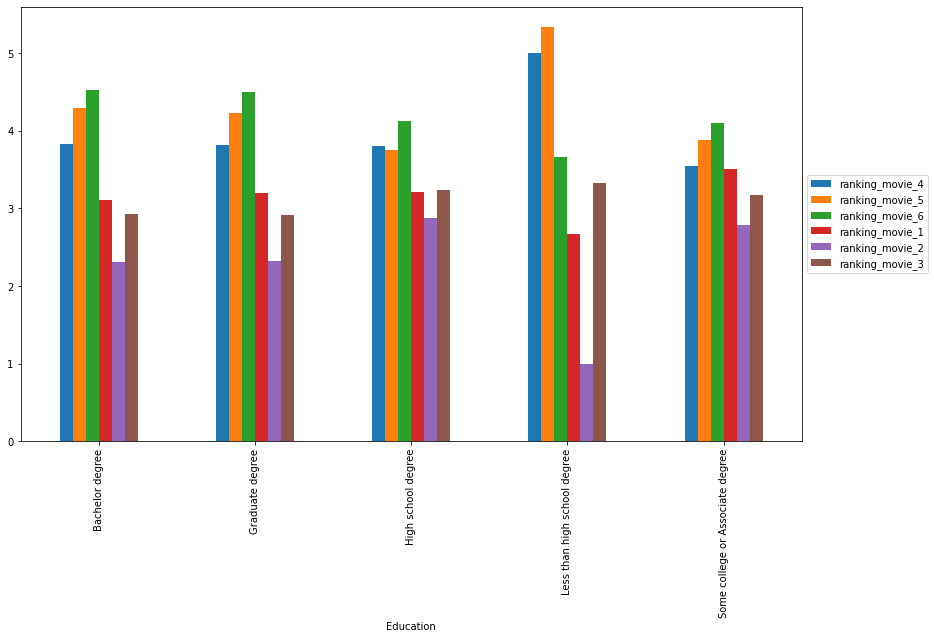

In [141]:
education.reset_index(inplace = True)

education.plot(x = 'Education', y = income.columns[8:14], kind='bar', figsize = (14,8));
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

### <span style='color: blue;'>Ranking</span>

#### For all education level, the second movie is the highest-ranked.

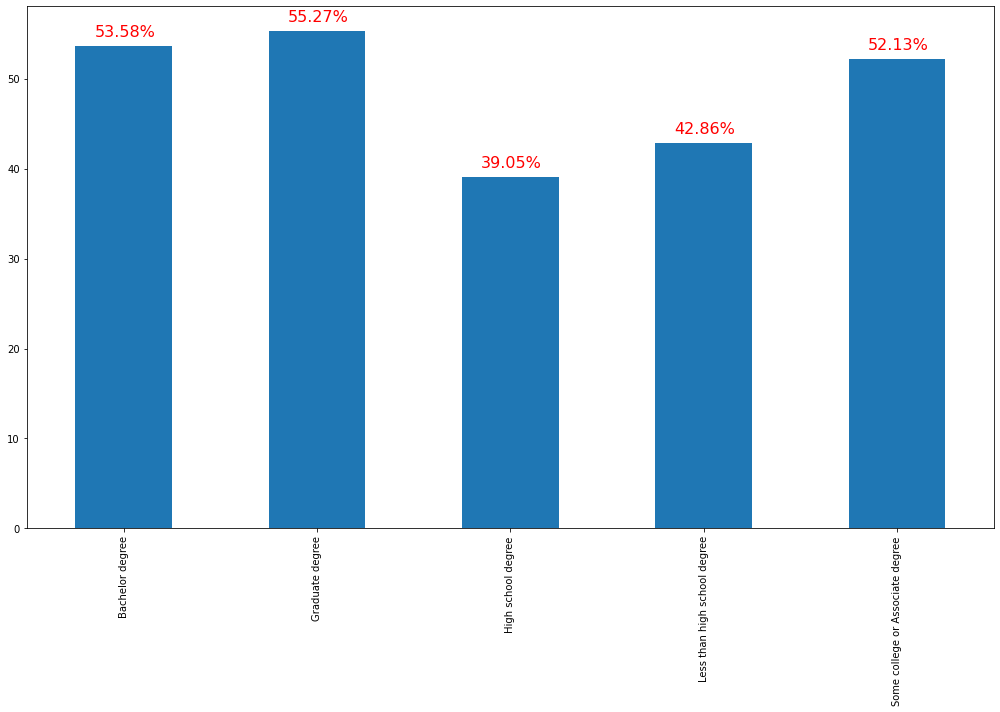

In [142]:
# Porcentage of fans per education level

ax = (
        (fans['Education'].value_counts() / star_wars['Education'].value_counts() * 100)
        .plot.bar(figsize = (14,10))
)

for p in ax.patches:
    ax.annotate('{}%'.format(round(p.get_height(), 2)), (p.get_x() + 0.1, p.get_height() + 1.1), fontsize = 16, color = 'red')
    ax.text

plt.tight_layout()
plt.show()

### <span style='color: blue;'>Fans per education level</span>

#### The percentage of fans per education level is bigger for the graduate degree.

<br /><br />
## <span style='color: red;'>Is the number of views related to age?</span>

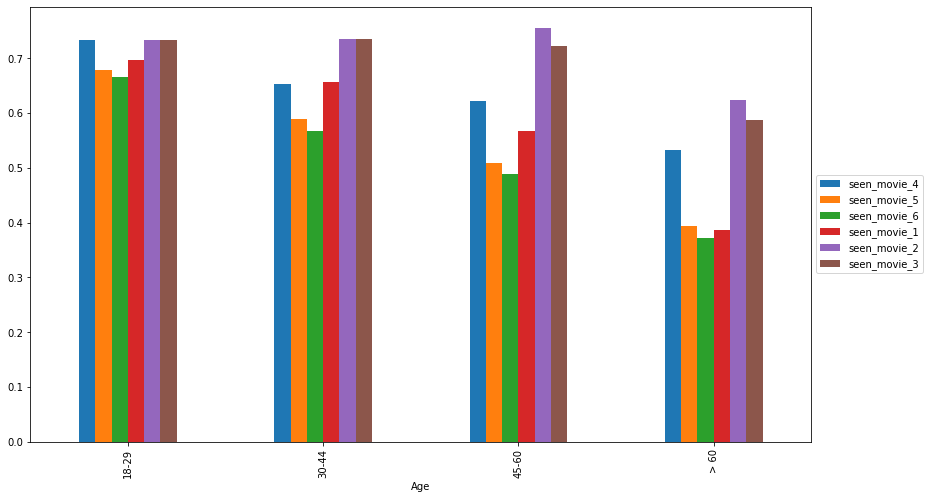

In [147]:
age = star_wars.groupby('Age').agg(np.mean)

age.reset_index(inplace = True)
age.plot(x = 'Age', y = income.columns[2:8], kind='bar', figsize = (14,8));
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

### <span style='color: blue;'>Views per age</span>

#### It is possible to note that for younger people we have more stable views for all movies.


# <span style='color: blue;'>Answer:</span>

## Yes, “The Empire Strikes Back” is clearly the best of the bunch. The movie number two is highest-ranked and has more views.